PROJECT TITLE:
An Analysis of Police Officer Stop Data

TEAM MEMBERS:
J.D. Strode
Vaidehee Shah
Octavio Origel
Peter Sparks
Melissa Mongrella


PROJECT DESCRIPTION/OUTLINE:
Our project is analyzing the The Stanford Open Project's Chicago dataset. 
We have chosen four questions from the dataset to further understand the nuances of traffic stops in the city.
    

RESEARCH QUESTIONS TO ANSWER:

1) How does the race and gender of the police officer affect the race and gender of the person getting stopped?
2) What area of Chicago do the most stops occur?
3) What are the most common time points for a stop to occur?
4) Was a citation issued?
5) What are the general demographics of people who get pulled over?

DATASETS TO BE USED:
We will be using the Stanford Opening Policing Project (https://openpolicing.stanford.edu/)

ROUGH BREAKDOWN OF TASKS:
J.D. Strode - Will look at demographic relationships (Question 1)
Vaidehee Shah - Will look at the most common time points for a stop to occur (Question 3)
Octavio Origel - Will examine if age influences the occurrence of citations or arrests 
Peter Sparks - Will look at location data
Melissa Mongrella - Will look at the general demographics of people who get pulled over

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
# from api_key import g_key

# Incorporated citipy to determine city based on latitude and longitude
# from citipy import citipy

In [5]:
# File to Load (Remember to Change These)
crime_data = "crime_data/chicagodata.csv"

# Read Purchasing File and store into Pandas data frame
df = pd.read_csv(crime_data, encoding="utf-8")

C:\Users\jdstr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,16,17,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df.head()

,raw_row_number,date,time,location,lat,lng,subject_age,subject_race,subject_sex,officer_id_hash,...,officer_race,officer_sex,officer_years_of_service,type,violation,arrest_made,citation_issued,outcome,raw_race,raw_driver_race
0,1,2012-01-06,09:00:00,700 LINCOLN W,NaN,NaN,23.0,black,male,a6d791f976,...,white,male,17.0,vehicular,DRIVING ON SUSPENDED LICENSE,True,NaN,arrest,BLACK,NaN
1,2,2012-01-01,00:00:00,NaN,NaN,NaN,23.0,hispanic,male,81da9fab7e,...,white,male,2.0,vehicular,DRIVING/NEVER ISSUED LICENSE,True,NaN,arrest,HISPANIC,NaN
2,3,2012-01-01,01:00:00,0 NORTHWEST HWY & HILLSIDE RD S,NaN,NaN,38.0,white,female,NaN,...,NaN,NaN,NaN,vehicular,DRIVING ON SUSPENDED LICENSE,True,NaN,arrest,WHITE,NaN
3,4,2012-01-01,01:00:00,108 LAMON AVE N,NaN,NaN,35.0,black,male,048359e7c8,...,black,male,8.0,vehicular,IVC - FAIL TO STOP/SIGNAL CROSSWALK,True,NaN,arrest,BLACK,NaN
4,5,2012-01-01,01:00:00,3451 177TH ST W,NaN,NaN,20.0,black,male,NaN,...,NaN,NaN,NaN,vehicular,IVC - DRIVING 15-20 MPH ABOVE SPEED LIMIT,True,NaN,arrest,BLACK,NaN


In [7]:
df.count()

raw_row_number              846456
date                        846456
time                        846456
location                    775414
lat                         641014
lng                         641014
subject_age                 212223
subject_race                224139
subject_sex                 846121
officer_id_hash             152584
officer_age                  60063
officer_race                786791
officer_sex                 786791
officer_years_of_service    784276
type                        846455
violation                   846455
arrest_made                 212249
citation_issued             639944
outcome                     846456
raw_race                    212249
raw_driver_race              11906
dtype: int64

In [8]:
list(df.columns)

['raw_row_number',
 'date',
 'time',
 'location',
 'lat',
 'lng',
 'subject_age',
 'subject_race',
 'subject_sex',
 'officer_id_hash',
 'officer_age',
 'officer_race',
 'officer_sex',
 'officer_years_of_service',
 'type',
 'violation',
 'arrest_made',
 'citation_issued',
 'outcome',
 'raw_race',
 'raw_driver_race']

In [9]:
demo_df = df[['raw_row_number','subject_sex',
 'subject_race','officer_sex',
 'officer_race',
        ]]
demo_df.head()

,raw_row_number,subject_sex,subject_race,officer_sex,officer_race
0,1,male,black,male,white
1,2,male,hispanic,male,white
2,3,female,white,NaN,NaN
3,4,male,black,male,black
4,5,male,black,NaN,NaN


In [10]:
demo_df.count()

raw_row_number    846456
subject_sex       846121
subject_race      224139
officer_sex       786791
officer_race      786791
dtype: int64

In [11]:
demo_df = demo_df.dropna()
demo_df.count()

raw_row_number    164434
subject_sex       164434
subject_race      164434
officer_sex       164434
officer_race      164434
dtype: int64

Demographics Analysis

In [12]:
# row_number = demo_df['raw_row_number']
# date = demo_df['date']
# lat = demo_df['lat']
# lng = demo_df['lng']
# subject_age = demo_df['subject_age']
# subject_race = demo_df['subject_race']
# subject_sex = demo_df['subject_sex']
# officer_age = demo_df['officer_age']
# officer_race = demo_df['officer_race']
# officer_sex = demo_df['officer_sex']

In [13]:
#correlation between subject race & officer race

In [14]:
groupbyrace = demo_df.groupby(["subject_race"]).count()
groupbyrace = groupbyrace['raw_row_number']
groupbyrace

subject_race
asian/pacific islander     1780
black                     76035
hispanic                  54554
other                       143
unknown                    1139
white                     30783
Name: raw_row_number, dtype: int64

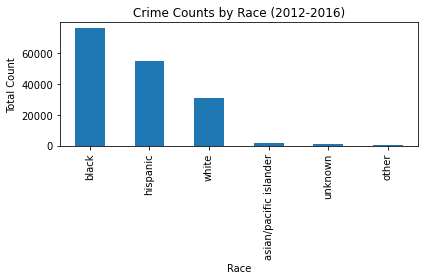

In [15]:
groupbyrace = groupbyrace.sort_values(ascending=False)

# Create a bar chart based off of the group series from before
racecounts = groupbyrace.plot(kind='bar')

# Set the xlabel and ylabel using class methods
racecounts.set_xlabel("Race")
racecounts.set_ylabel("Total Count")
racecounts.set_title("Crime Counts by Race (2012-2016)")

#show bar chart
plt.tight_layout()
# plt.savefig("../Images/micebar1.png")
plt.show()

Text(0, 0.5, 'Race')

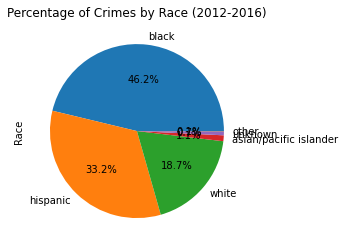

In [16]:
#group clean_df by race
groupbyrace.value_counts()

#set color formatting
colors=["blue", "orange"]

#Create the pie based upon the values above
groupbyrace.plot(kind="pie",autopct="%1.1f%%")

plt.title("Percentage of Crimes by Race (2012-2016)")
plt.ylabel("Race")
# plt.savefig("../Images/micepie1.png")

In [17]:
demo_df.head()
demo_df.count()

raw_row_number    164434
subject_sex       164434
subject_race      164434
officer_sex       164434
officer_race      164434
dtype: int64

In [ ]:
demo_df.plot(x='subject_race', kind="bar", stacked=False)




In [30]:
groupbysubjectrace = demo_df.groupby(["subject_race"])
groupbysubjectrace['officer_race'].count()

subject_race
asian/pacific islander     1780
black                     76035
hispanic                  54554
other                       143
unknown                    1139
white                     30783
Name: officer_race, dtype: int64

In [19]:
racevsrace = groupbysubjectrace["officer_race"].value_counts()
racevsrace.index.name = None

In [20]:
racevsrace

subject_race            officer_race          
asian/pacific islander  white                      1294
                        hispanic                    240
                        black                       168
                        asian/pacific islander       44
                        unknown                      32
                        other                         2
black                   white                     49267
                        black                     12707
                        hispanic                  11239
                        asian/pacific islander     1702
                        unknown                    1042
                        other                        78
hispanic                white                     41450
                        hispanic                   7567
                        black                      3453
                        asian/pacific islander     1198
                        unknown                     851
 

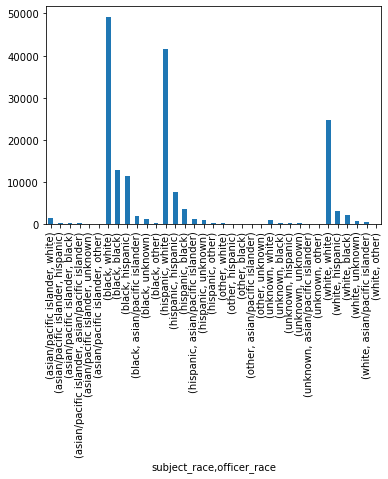

In [21]:
racevsrace.plot(x='subject_race', kind="bar", stacked=False)

In [42]:
racevsrace_df = pd.DataFrame(racevsrace)
racevsrace_df = racevsrace_df.rename(columns={"officer_race": "count"})
racevsrace_df = racevsrace_df.reset_index(level="officer_race")
racevsrace_df

,officer_race,count
subject_race,,
asian/pacific islander,white,1294
asian/pacific islander,hispanic,240
asian/pacific islander,black,168
asian/pacific islander,asian/pacific islander,44
asian/pacific islander,unknown,32
asian/pacific islander,other,2
black,white,49267
black,black,12707
black,hispanic,11239


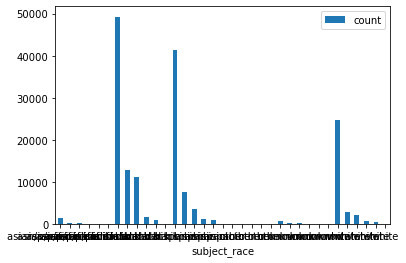

In [44]:
# racevsrace_df.plot(x="", kind="bar", stacked=True)
racevsrace_df.plot.bar(rot=0)

In [37]:
x = ["asian/pacific islander", "black", "hispanic", "other", "unknown", "white"]

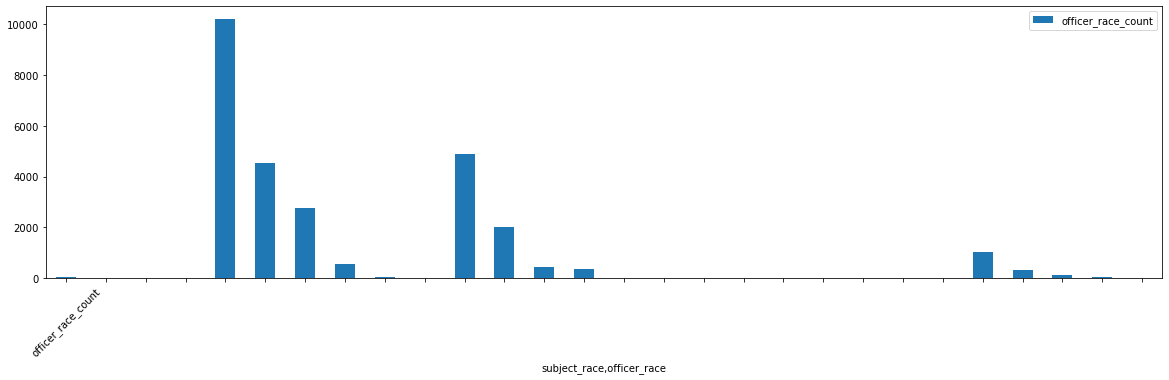

<Figure size 432x288 with 0 Axes>

In [70]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = racevsrace_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(, rotation=45)

plt.show()
plt.tight_layout()